#### 手動計算TF-IDF

In [1]:
import math

class TfIdf:
    def __init__(self):
        self.num_docs = 0
        self.vocab = {}

    def add_corpus(self, corpus):
        # count the number of documents
        self.num_docs += len(corpus)
        # call the _merge_corpus function to get self.vocab
        self._merge_corpus(corpus)

        tfidf_list = []
        for sentence in corpus:
            tfidf_list.append(self.get_tfidf(sentence))
        return tfidf_list

    # get all the vocab and their counts in your corpus
    def _merge_corpus(self, corpus):
        for sentence in corpus:
            # strip() is often used to ensure that any extra spaces at the beginning or end of the sentence
            words = sentence.strip().split()
            # Use set() to remove duplicate words
            words = set(words)
            for word in words:
                self.vocab[word] = self.vocab.get(word, 0.0) + 1.0

    def _get_idf(self, term):
        return math.log(self.num_docs / (self.vocab.get(term, 0.0) + 1.0))

    def get_tfidf(self, sentence):
        tfidf = {}
        terms = sentence.strip().split()
        terms_set = set(terms)
        num_terms = len(terms)
        for term in terms_set:
            tf = float(terms.count(term)) / num_terms
            idf = self._get_idf(term)
            tfidf[term] = tf * idf
        return tfidf

In [2]:
corpus = [
    "what is the weather like today",
    "what is for dinner tonight",
    "this is question worth pondering",
    "it is a beautiful day today"
]

tfidf = TfIdf()
tfidf_values = tfidf.add_corpus(corpus)
for tfidf_value in tfidf_values:
    print(tfidf_value)

{'weather': 0.11552453009332421, 'what': 0.04794701207529681, 'is': -0.03719059188570162, 'today': 0.04794701207529681, 'the': 0.11552453009332421, 'like': 0.11552453009332421}
{'what': 0.05753641449035617, 'is': -0.044628710262841945, 'tonight': 0.13862943611198905, 'dinner': 0.13862943611198905, 'for': 0.13862943611198905}
{'question': 0.13862943611198905, 'is': -0.044628710262841945, 'this': 0.13862943611198905, 'pondering': 0.13862943611198905, 'worth': 0.13862943611198905}
{'a': 0.11552453009332421, 'is': -0.03719059188570162, 'today': 0.04794701207529681, 'beautiful': 0.11552453009332421, 'it': 0.11552453009332421, 'day': 0.11552453009332421}


#### 使用sklearn計算TF-IDF

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "what is the weather like today",
    "what is for dinner tonight",
    "this is question worth pondering",
    "it is a beautiful day today"
]

tfidf_vec = TfidfVectorizer()

tfidf_matrix = tfidf_vec.fit_transform(corpus)
print("(corpus的第幾句話,每個單詞對應的ID)","tfidf-value")
print(tfidf_matrix)

(corpus的第幾句話,每個單詞對應的ID) tfidf-value
  (0, 11)	0.3710221459250386
  (0, 6)	0.47059454669821993
  (0, 13)	0.47059454669821993
  (0, 9)	0.47059454669821993
  (0, 4)	0.24557575678403082
  (0, 14)	0.3710221459250386
  (1, 12)	0.506765426545092
  (1, 2)	0.506765426545092
  (1, 3)	0.506765426545092
  (1, 4)	0.2644512224141842
  (1, 14)	0.3995396830595886
  (2, 7)	0.4838025881780501
  (2, 15)	0.4838025881780501
  (2, 8)	0.4838025881780501
  (2, 10)	0.4838025881780501
  (2, 4)	0.25246826075544676
  (3, 1)	0.506765426545092
  (3, 0)	0.506765426545092
  (3, 5)	0.506765426545092
  (3, 11)	0.3995396830595886
  (3, 4)	0.2644512224141842


In [4]:
# 得到不重複的單字
print(tfidf_vec.get_feature_names_out())
# 得到每個單詞對應的ID
print(tfidf_vec.vocabulary_)

['beautiful' 'day' 'dinner' 'for' 'is' 'it' 'like' 'pondering' 'question'
 'the' 'this' 'today' 'tonight' 'weather' 'what' 'worth']
{'what': 14, 'is': 4, 'the': 9, 'weather': 13, 'like': 6, 'today': 11, 'for': 3, 'dinner': 2, 'tonight': 12, 'this': 10, 'question': 8, 'worth': 15, 'pondering': 7, 'it': 5, 'beautiful': 0, 'day': 1}


#### 繪畫文字雲

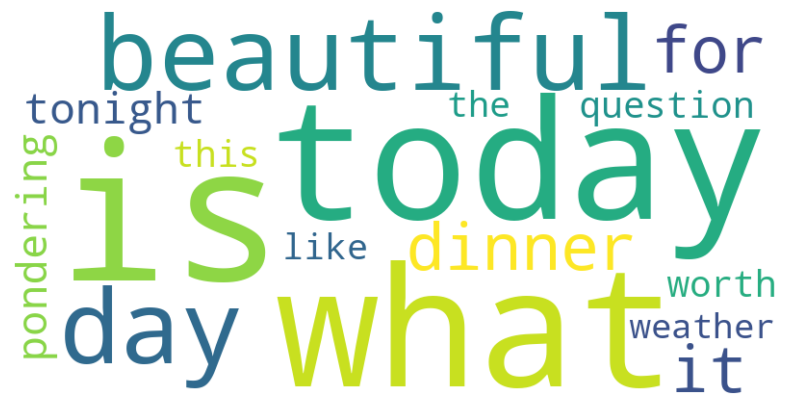

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Your corpus
corpus = [
    "what is the weather like today",
    "what is for dinner tonight",
    "this is question worth pondering",
    "it is a beautiful day today"
]

# Initialize the TF-IDF Vectorizer and transform the corpus
tfidf_vec = TfidfVectorizer()
tfidf_matrix = tfidf_vec.fit_transform(corpus)

# Get the feature names (terms)
feature_names = tfidf_vec.get_feature_names_out()

# Aggregate the TF-IDF scores for each term across all documents
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_dict = dict(zip(feature_names, tfidf_scores))

# Create a word cloud using the aggregated TF-IDF scores
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
